# "Importing Libraries"

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
plt.style.use('dark_background')

# "Reading Data"

In [2]:
data_train = pd.read_csv('aug_train.csv')
data_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
data_test = pd.read_csv ('aug_test.csv')
data_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [4]:
target_data_test = pd.read_csv ('sample_submission.csv')
target_data_test

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5
...,...,...
2124,1289,0.5
2125,195,0.5
2126,31762,0.5
2127,7873,0.5


# "Data Information For (Data_Train)"

In [5]:
data_train.info()
data_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
data_train.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [7]:
data_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
data_train.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


# "Data Visualization For (Data_Train)"

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

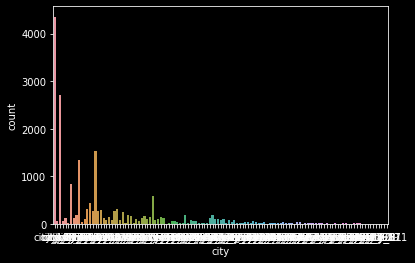

In [9]:
sns.countplot (data_train['city'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_development_index', ylabel='count'>

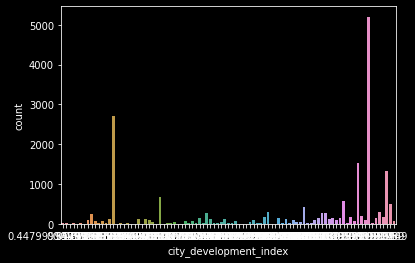

In [10]:
sns.countplot (data_train['city_development_index'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

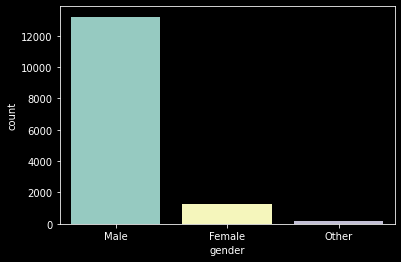

In [11]:
sns.countplot (data_train['gender'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

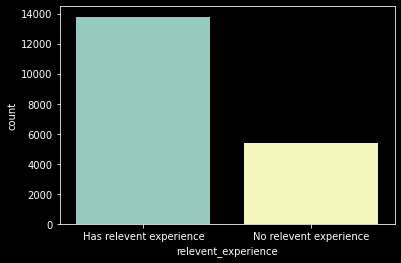

In [12]:
sns.countplot (data_train['relevent_experience'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

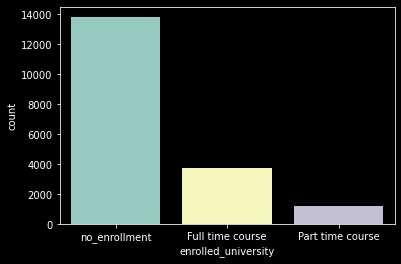

In [13]:
sns.countplot (data_train['enrolled_university'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_level', ylabel='count'>

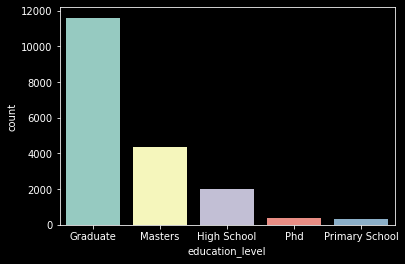

In [14]:
sns.countplot (data_train['education_level'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='major_discipline', ylabel='count'>

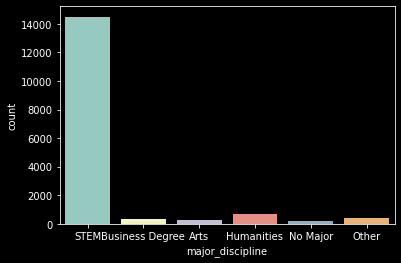

In [15]:
sns.countplot (data_train['major_discipline'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='experience', ylabel='count'>

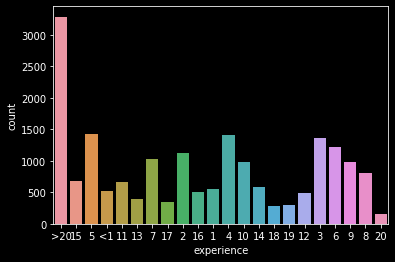

In [16]:
sns.countplot (data_train['experience'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_size', ylabel='count'>

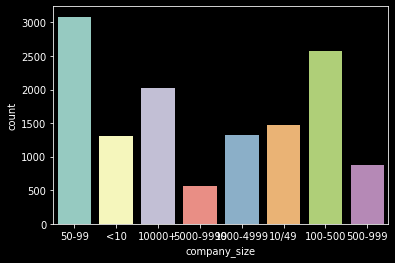

In [17]:
sns.countplot (data_train['company_size'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_type', ylabel='count'>

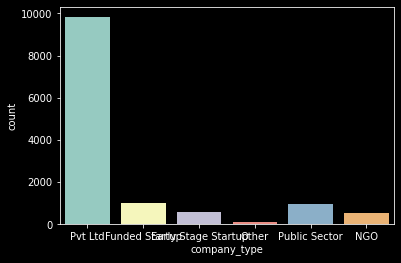

In [18]:
sns.countplot (data_train['company_type'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_new_job', ylabel='count'>

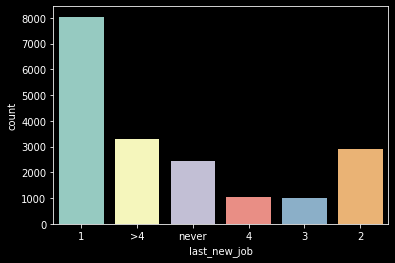

In [19]:
sns.countplot (data_train['last_new_job'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='training_hours', ylabel='count'>

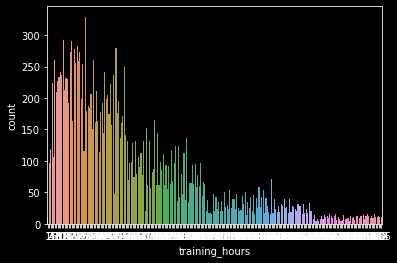

In [20]:
#plt.figure(figsize=(20, 15))
sns.countplot (data_train['training_hours'])

# "Data Splitting From (Data_Train) To (X_Train & Y_Train)"

In [21]:
x_train = data_train.iloc[:,:-1].values
x_train

array([[8949, 'city_103', 0.92, ..., nan, '1', 36],
       [29725, 'city_40', 0.7759999999999999, ..., 'Pvt Ltd', '>4', 47],
       [11561, 'city_21', 0.624, ..., nan, 'never', 83],
       ...,
       [24576, 'city_103', 0.92, ..., 'Pvt Ltd', '4', 44],
       [5756, 'city_65', 0.802, ..., 'Pvt Ltd', '2', 97],
       [23834, 'city_67', 0.855, ..., nan, '1', 127]], dtype=object)

In [22]:
y_train = data_train.iloc[:,-1].values
y_train

array([1., 0., 0., ..., 0., 0., 0.])

# "Processing Missing Data By SimpleImputer In (Data Train)"

In [23]:
imputer = SimpleImputer (missing_values = np.NaN , strategy = 'most_frequent')
imputer = imputer.fit(x_train[:,:])
x_train[:,:] = imputer.transform(x_train[:,:])

In [24]:
df_train = pd.DataFrame (x_train , columns=['enrollee_id','city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours'])
df_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42
19154,31398,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52
19155,24576,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2,97


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   enrollee_id             19158 non-null  object
 1   city                    19158 non-null  object
 2   city_development_index  19158 non-null  object
 3   gender                  19158 non-null  object
 4   relevent_experience     19158 non-null  object
 5   enrolled_university     19158 non-null  object
 6   education_level         19158 non-null  object
 7   major_discipline        19158 non-null  object
 8   experience              19158 non-null  object
 9   company_size            19158 non-null  object
 10  company_type            19158 non-null  object
 11  last_new_job            19158 non-null  object
 12  training_hours          19158 non-null  object
dtypes: object(13)
memory usage: 1.9+ MB


# "Encoding Data For (Data_Train)"

In [26]:
LE = LabelEncoder()
df_train['city'] = LE.fit_transform(df_train['city'])
df_train['gender'] = LE.fit_transform(df_train['gender'])
df_train['relevent_experience'] = LE.fit_transform(df_train['relevent_experience'])
df_train['enrolled_university'] = LE.fit_transform(df_train['enrolled_university'])
df_train['education_level'] = LE.fit_transform(df_train['education_level'])
df_train['major_discipline'] = LE.fit_transform(df_train['major_discipline'])
df_train['experience'] = LE.fit_transform(df_train['experience'])
df_train['company_size'] = LE.fit_transform(df_train['company_size'])
df_train['company_type'] = LE.fit_transform(df_train['company_type'])
df_train['last_new_job'] = LE.fit_transform(df_train['last_new_job'])
df_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,5,0.92,1,0,2,0,5,21,4,5,0,36
1,29725,77,0.776,1,1,2,0,5,6,4,5,4,47
2,11561,64,0.624,1,1,0,0,5,15,4,5,5,83
3,33241,14,0.789,1,1,2,0,1,20,4,5,5,52
4,666,50,0.767,1,0,2,2,5,21,4,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,1,1,2,0,2,5,4,5,0,42
19154,31398,5,0.92,1,0,2,0,5,5,4,5,3,52
19155,24576,5,0.92,1,0,2,0,5,21,4,5,3,44
19156,5756,94,0.802,1,0,2,1,5,20,5,5,1,97


In [27]:
df_train.head(30)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,5,0.92,1,0,2,0,5,21,4,5,0,36
1,29725,77,0.776,1,1,2,0,5,6,4,5,4,47
2,11561,64,0.624,1,1,0,0,5,15,4,5,5,83
3,33241,14,0.789,1,1,2,0,1,20,4,5,5,52
4,666,50,0.767,1,0,2,2,5,21,4,1,3,8
5,21651,57,0.764,1,0,1,0,5,2,4,5,0,24
6,28806,49,0.92,1,0,2,1,5,15,4,1,0,24
7,402,83,0.762,1,0,2,0,5,4,7,5,4,18
8,27107,5,0.92,1,0,2,0,5,17,4,5,0,46
9,699,5,0.92,1,0,2,0,5,8,3,5,4,123


In [28]:
df_train.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
dtype: int64

# " Scaling Data By Standard Scaler in df_train "

In [29]:
data = np.array(df_train) 
data

array([[8949, 5, 0.92, ..., 5, 0, 36],
       [29725, 77, 0.7759999999999999, ..., 5, 4, 47],
       [11561, 64, 0.624, ..., 5, 5, 83],
       ...,
       [24576, 5, 0.92, ..., 5, 3, 44],
       [5756, 94, 0.802, ..., 5, 1, 97],
       [23834, 95, 0.855, ..., 5, 0, 127]], dtype=object)

In [30]:
SC = StandardScaler()
data[:,:] = SC.fit_transform(data[:,:])

In [31]:
df_data_train = pd.DataFrame(data, columns=['enrollee_id','city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours'])
df_data_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,-0.824285,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,1.219489,0.361261,0.393556,-0.902189,-0.488985
1,1.336271,0.925077,-0.42841,0.204235,1.603202,0.568358,-0.692508,0.296787,-1.050773,0.361261,0.393556,1.164364,-0.305825
2,-0.552655,0.558499,-1.66059,0.204235,1.603202,-1.931321,-0.692508,0.296787,0.311384,0.361261,0.393556,1.681003,0.293607
3,1.70191,-0.851418,-0.323026,0.204235,1.603202,0.568358,-0.692508,-3.909499,1.068138,0.361261,0.393556,1.681003,-0.222571
4,-1.685658,0.163722,-0.501368,0.204235,-0.623752,0.568358,1.315676,0.296787,1.219489,0.361261,-2.690501,0.647726,-0.955209
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,-0.986826,0.304714,0.398448,0.204235,1.603202,0.568358,-0.692508,-2.857927,-1.202124,0.361261,0.393556,-0.902189,-0.389079
19154,1.510252,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,-1.202124,0.361261,0.393556,0.647726,-0.222571
19155,0.800812,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,1.219489,0.361261,0.393556,0.647726,-0.355778
19156,-1.156334,1.404449,-0.217642,0.204235,-0.623752,0.568358,0.311584,0.296787,1.068138,0.921897,0.393556,-0.385551,0.526719


In [32]:
X_train = np.array(df_data_train)

In [33]:
Y_train = np.array(y_train)

In [72]:
sns.heatmap(npdf_data_train)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

AttributeError: 'NoneType' object has no attribute 'reshape'

<Figure size 432x288 with 2 Axes>

# "Data Information For (Data_Test)"

In [34]:
data_test.info()
data_test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [35]:
data_test.nunique()

enrollee_id               2129
city                       108
city_development_index      81
gender                       3
relevent_experience          2
enrolled_university          3
education_level              5
major_discipline             6
experience                  22
company_size                 8
company_type                 6
last_new_job                 6
training_hours             223
dtype: int64

In [36]:
data_test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [37]:
data_test.corr()

,enrollee_id,city_development_index,training_hours
enrollee_id,1.000000,-0.045087,0.003239
city_development_index,-0.045087,1.000000,-0.022653
training_hours,0.003239,-0.022653,1.000000


# "Data Visualization For (Data_Test)"

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

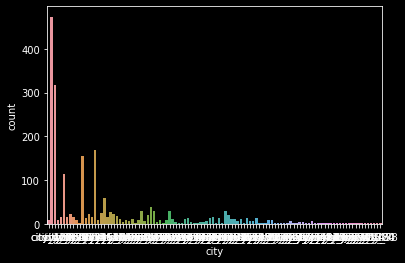

In [38]:
sns.countplot (data_test['city'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_development_index', ylabel='count'>

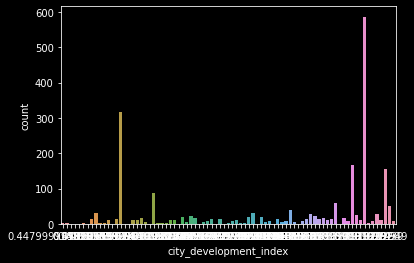

In [39]:
sns.countplot (data_test['city_development_index'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

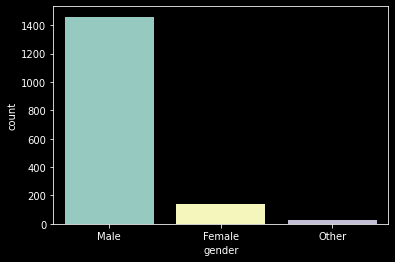

In [40]:
sns.countplot (data_test['gender'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

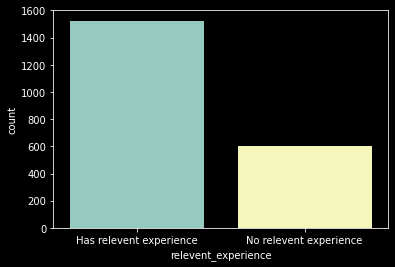

In [41]:
sns.countplot (data_test['relevent_experience'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

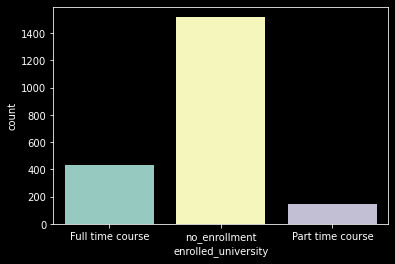

In [42]:
sns.countplot (data_test['enrolled_university'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_level', ylabel='count'>

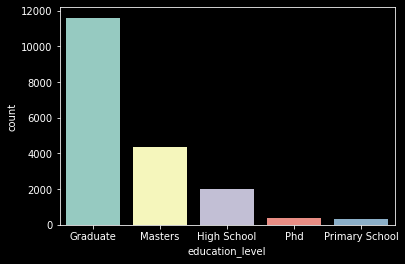

In [43]:
sns.countplot (data_train['education_level'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='major_discipline', ylabel='count'>

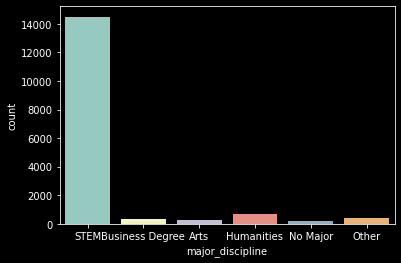

In [44]:
sns.countplot (data_train['major_discipline'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='experience', ylabel='count'>

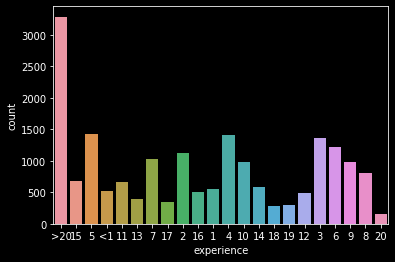

In [45]:
sns.countplot (data_train['experience'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_size', ylabel='count'>

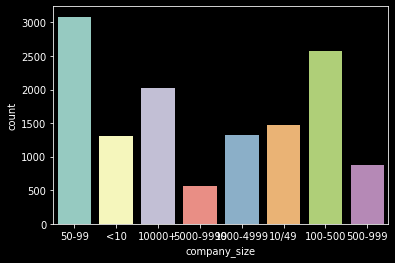

In [46]:
sns.countplot (data_train['company_size'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_type', ylabel='count'>

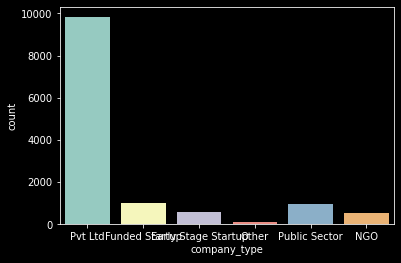

In [47]:
sns.countplot (data_train['company_type'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_new_job', ylabel='count'>

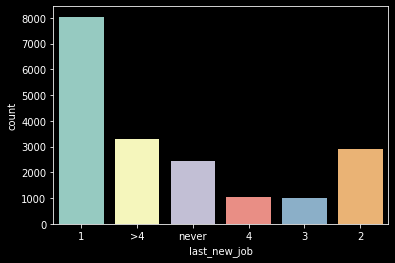

In [48]:
sns.countplot (data_train['last_new_job'])

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='training_hours', ylabel='count'>

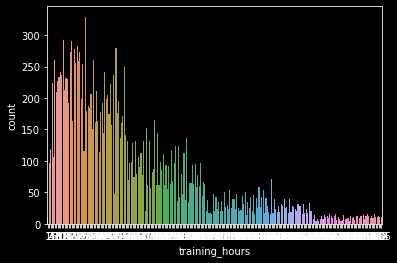

In [49]:
#plt.figure(figsize=(20, 15))
sns.countplot (data_train['training_hours'])

# Representing (Data_Test) as (X_Test)

In [50]:
x_test = data_test.iloc[:,:].values
x_test

array([[32403, 'city_41', 0.8270000000000001, ..., nan, '1', 21],
       [9858, 'city_103', 0.92, ..., 'Pvt Ltd', '1', 98],
       [31806, 'city_21', 0.624, ..., 'Pvt Ltd', 'never', 15],
       ...,
       [31762, 'city_100', 0.887, ..., 'Pvt Ltd', 'never', 18],
       [7873, 'city_102', 0.804, ..., 'Public Sector', '1', 84],
       [12215, 'city_102', 0.804, ..., 'Pvt Ltd', '2', 11]], dtype=object)

# "Data Splitting From (Target_Data_Test) To (Y_Test)"¶

C:\Users\mahmo\.conda\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

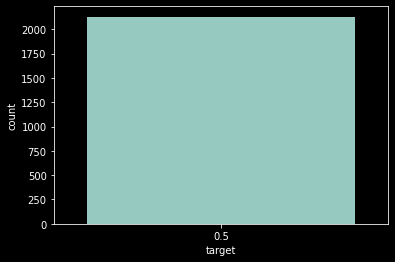

In [51]:
sns.countplot (target_data_test.target)

In [52]:
test_target=target_data_test['target'].astype(int)

In [53]:
y_test = test_target
y_test

0       0
1       0
2       0
3       0
4       0
       ..
2124    0
2125    0
2126    0
2127    0
2128    0
Name: target, Length: 2129, dtype: int32

# "Processing Missing Data By SimpleImputer In (Data Test)"¶

In [54]:
imputer = SimpleImputer (missing_values = np.NaN , strategy = 'most_frequent')
imputer = imputer.fit(x_test[:,:])
x_test[:,:] = imputer.transform(x_test[:,:])

In [55]:
df_test = pd.DataFrame (x_test , columns=['enrollee_id','city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours'])
df_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1,21
1,9858,city_103,0.92,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,<1,50-99,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.92,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,50-99,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,50-99,Pvt Ltd,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,STEM,3,50-99,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,STEM,7,100-500,Public Sector,1,84


In [56]:
df_test.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

# "Encoding Data For (Data_Test)"

In [57]:
LE = LabelEncoder()
df_test['city'] = LE.fit_transform(df_test['city'])
df_test['gender'] = LE.fit_transform(df_test['gender'])
df_test['relevent_experience'] = LE.fit_transform(df_test['relevent_experience'])
df_test['enrolled_university'] = LE.fit_transform(df_test['enrolled_university'])
df_test['education_level'] = LE.fit_transform(df_test['education_level'])
df_test['major_discipline'] = LE.fit_transform(df_test['major_discipline'])
df_test['experience'] = LE.fit_transform(df_test['experience'])
df_test['company_size'] = LE.fit_transform(df_test['company_size'])
df_test['company_type'] = LE.fit_transform(df_test['company_type'])
df_test['last_new_job'] = LE.fit_transform(df_test['last_new_job'])
df_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,69,0.827,1,0,0,0,5,19,7,5,0,21
1,9858,5,0.92,0,0,2,0,5,15,4,5,0,98
2,31806,55,0.624,1,1,2,1,5,20,4,5,5,15
3,27385,22,0.827,1,0,2,2,5,2,0,5,0,39
4,27724,5,0.92,1,0,2,0,5,21,3,5,4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,5,0.92,1,1,2,0,2,7,4,4,3,15
2125,195,25,0.897,1,0,2,2,5,9,4,5,1,30
2126,31762,2,0.887,1,1,2,4,5,13,4,5,5,18
2127,7873,4,0.804,1,0,0,1,5,17,1,4,0,84


# " Scaling Data By Standard Scaler in df_test "

In [58]:
data2 = np.array(df_test) 
data2

array([[32403, 69, 0.8270000000000001, ..., 5, 0, 21],
       [9858, 5, 0.92, ..., 5, 0, 98],
       [31806, 55, 0.624, ..., 5, 5, 15],
       ...,
       [31762, 2, 0.887, ..., 5, 5, 18],
       [7873, 4, 0.804, ..., 4, 0, 84],
       [12215, 4, 0.804, ..., 5, 1, 11]], dtype=object)

In [59]:
SC = StandardScaler()
data2[:,:] = SC.fit_transform(data2[:,:])

In [60]:
df_data_test = pd.DataFrame(data2, columns=['enrollee_id','city','city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours'])
df_data_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,1.62319,1.03668,0.016126,0.196708,-0.630065,-1.878304,-0.705098,0.291135,0.888727,1.987886,0.383779,-0.904106,-0.730319
1,-0.731479,-1.103659,0.75986,-3.509406,-0.630065,0.587115,-0.705098,0.291135,0.282188,0.364069,0.383779,-0.904106,0.54823
2,1.560837,0.56848,-1.607295,0.196708,1.587138,0.587115,0.282503,0.291135,1.040362,0.364069,0.383779,1.720439,-0.829946
3,1.099094,-0.535132,0.016126,0.196708,-0.630065,0.587115,1.270103,0.291135,-1.689066,-1.801021,0.383779,-0.904106,-0.431437
4,1.134501,-1.103659,0.75986,0.196708,-0.630065,0.587115,-0.705098,0.291135,1.191997,-0.177204,0.383779,1.19553,0.116513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,-1.626451,-1.103659,0.75986,0.196708,1.587138,0.587115,-0.705098,-3.04725,-0.930891,0.364069,-0.414916,0.670621,-0.829946
2125,-1.740712,-0.434803,0.575926,0.196708,-0.630065,0.587115,1.270103,0.291135,-0.627622,0.364069,0.383779,-0.379197,-0.580878
2126,1.556242,-1.203988,0.495955,0.196708,1.587138,0.587115,3.245304,0.291135,-0.021082,0.364069,0.383779,1.720439,-0.780132
2127,-0.938798,-1.137102,-0.167809,0.196708,-0.630065,-1.878304,0.282503,0.291135,0.585457,-1.259748,-0.414916,-0.904106,0.315767


In [61]:
X_test = np.array(df_data_test) 

In [62]:
Y_test = np.array(y_test) 

# "Predicting Data"

In [63]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
Y_pred

array([0., 0., 0., ..., 0., 0., 0.])

# "Classification Report"

In [64]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.84      0.92      2129
         1.0       0.00      0.00      0.00         0

    accuracy                           0.84      2129
   macro avg       0.50      0.42      0.46      2129
weighted avg       1.00      0.84      0.92      2129



C:\Users\mahmo\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahmo\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mahmo\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
print(accuracy_score(Y_test,Y_pred))

0.8445279473931423


In [66]:
df_comp = pd.DataFrame({'Actual':Y_test , 'Predict':Y_pred})
df_comp

,Actual,Predict
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
2124,0,0.0
2125,0,0.0
2126,0,0.0
2127,0,0.0


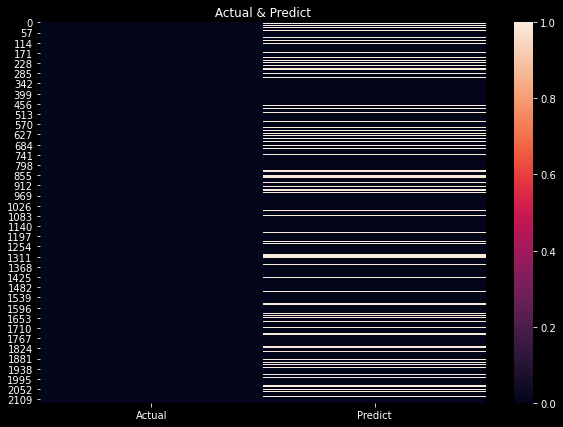

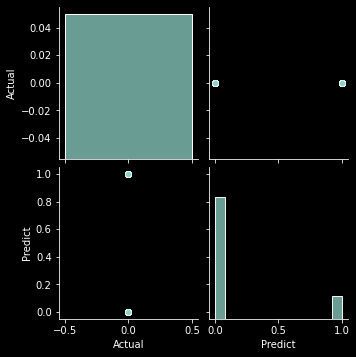

In [67]:
plt.figure(figsize=(10, 7))
plt.title (' Actual & Predict ',color = 'w')
sns.heatmap (df_comp)
sns.pairplot(df_comp)

In [68]:
print ('y_test = ',Y_test.sum())
print ('y_pred = ',Y_pred.sum())

y_test =  0
y_pred =  331.0


([<matplotlib.patches.Wedge at 0x1fbc408e100>,
 [Text(6.735557395310444e-17, 1.1, 'Looking for a job change'),
  Text(-2.0206672185931328e-16, -1.1, 'Not looking for job change')],
 [Text(3.6739403974420595e-17, 0.6, '0%'),
  Text(-1.1021821192326178e-16, -0.6, '100%')])

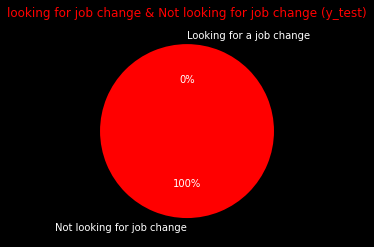

In [69]:
data = [0,2129]
names = ['Looking for a job change','Not looking for job change']
plt.title ('looking for job change & Not looking for job change (y_test)',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

([<matplotlib.patches.Wedge at 0x1fbc40cbca0>,
 [Text(-0.5163868635009394, 0.9712592893783114, 'Looking for a job change'),
  Text(0.5163868635009393, -0.9712592893783114, 'Not looking for job change')],
 [Text(-0.2816655619096033, 0.5297777942063516, '16%'),
  Text(0.28166556190960323, -0.5297777942063516, '84%')])

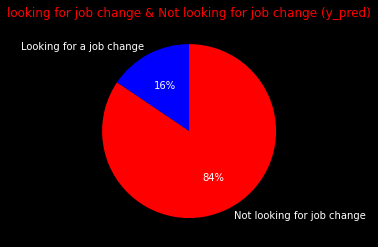

In [70]:
data = [331,1797]
names = ['Looking for a job change','Not looking for job change']
plt.title ('looking for job change & Not looking for job change (y_pred)',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)